<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# 1. toy 데이터 생성하기
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)

# 1.1 데이터 확인
X.shape

(100, 2)

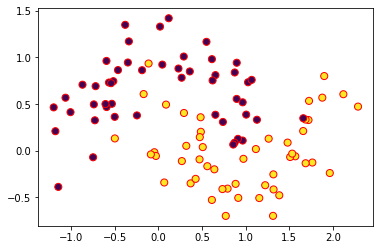

In [49]:
plt.scatter(X[:,0],X[:,1],edgecolors='red',s=50,c=y)

In [50]:
# 1.2 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# 1.3 분할 데이터 확인
X_train.shape, y_train.shape

((80, 2), (80,))

In [51]:
# 2. random forest 모델링을 위할 객체 생성
# n_estimators : 만들 의사결정나무 개수
forest = RandomForestClassifier(n_estimators=5, random_state=5)

# 3. 모델 적합
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [52]:
# 4. 결과 확인
print("train accuracy {:.2f}".format(forest.score(X_train, y_train)))
print("test accuracy {:.2f}".format(forest.score(X_test, y_test)))


train accuracy 1.00
test accuracy 0.85


In [53]:
# 5 트리 확인
forest.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=953453411, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=236996814, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [54]:
from sklearn.tree import export_graphviz
import graphviz

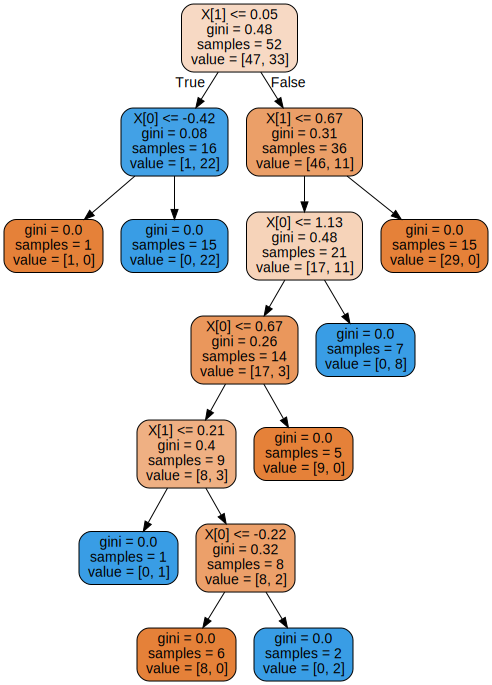

In [55]:

# 5-1 트리 일부 확인
export_graphviz(forest.estimators_[0], out_file = "rf{}.dot".format(0),
                rounded=True, proportion=False,
                filled=True, precision=2)
with open("rf0.dot") as f1:
    dot_graph1 = f1.read()
graphviz.Source(dot_graph1)

여기서 estimators값을 0에서 5까지 변경시켜보면서 확인할 수 있습니다


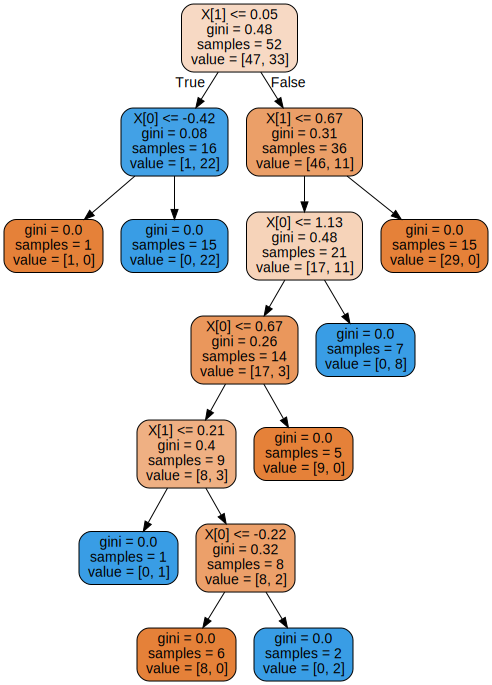

In [56]:
export_graphviz(forest.estimators_[0], out_file = "rf{}.dot".format(0),
                rounded=True, proportion=False,
                filled=True, precision=2)
with open("rf{}.dot".format(0)) as f1:
    dot_graph1 = f1.read()
graphviz.Source(dot_graph1)

RandomForest 예제

In [57]:
# 1 데이터 호출
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()

In [58]:
# 1-1 데이터 분류
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [59]:
# 2 n_estimators
depths=range(5,201,5)
forest_train,forest_test = [],[]

In [60]:
for i in depths:    
    forest = RandomForestClassifier(n_estimators=i, random_state=i)
    forest.fit(X_train,y_train)
    
    forest_train.append(forest.score(X_train,y_train))
    forest_test.append(forest.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_

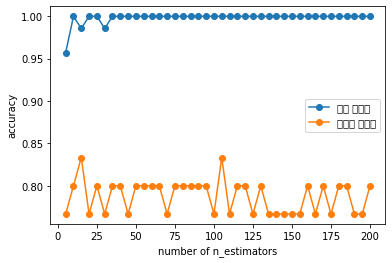

In [61]:
plt.plot(depths,forest_train,label='훈련 정확도',marker='o')
plt.plot(depths,forest_test,label='테스트 정확도',marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of n_estimators')
plt.legend()